In [1]:
import pandas as pd

In [2]:
# The data: 'Disorder Involving the Media' – records of political violence and demonstrations involving journalists and media workers.
# Source: Downloaded from the Armed Conflict Location & Event Data Project (ACLED): https://acleddata.com/curated-data-files/#media
# Note: Time period coverage varies by country and region. Data are updated on a weekly basis (typically every Monday or Tuesday),
# This dataset was downloaded on July 8, 2025.

journalists = pd.read_csv("journalists.csv")
journalists.head()

,event_id_cnty,event_date,year,time_precision,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,...,location,latitude,longitude,geo_precision,source,source_scale,notes,fatalities,tags,timestamp
0,PSE76697,2025-06-27,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Israel (2022-),NaN,External/Other forces,...,Gaza - At Tuffah,31.5134,34.4751,1,Haaretz; Palestine News and Information Agency...,National-Regional,"On 27 June 2025, Israeli warplanes targeted a ...",10,NaN,1751322271
1,PSE76731,2025-06-27,2025,1,Political violence,Explosions/Remote violence,Air/drone strike,Military Forces of Israel (2022-),NaN,External/Other forces,...,Gaza,31.5045,34.4743,1,Liveuamap; Quds News Network,Local partner-New media,"On 27 June 2025, Israeli warplanes targeted a ...",14,NaN,1751322271
2,SYR144765,2025-06-27,2025,1,Strategic developments,Strategic developments,Arrests,Police Forces of Syria (2024-),NaN,State forces,...,Damascus,33.5172,36.2767,1,SOHR; Twitter,Other-New media,"On 27 June 2025, police forces arrested a Kurd...",0,NaN,1751322301
3,IND187462,2025-06-27,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (India),Dalit Caste Group (India); Farmers (India); Jo...,Protesters,...,Bengaluru,12.9719,77.5936,1,Deccan Herald,Subnational,"On 27 June 2025, farmers, members of Dalit San...",0,crowd size=no report,1751395392
4,GEO5167,2025-06-26,2025,1,Demonstrations,Protests,Peaceful protest,Protesters (Georgia),Journalists (Georgia),Protesters,...,Tbilisi,41.7183,44.8306,1,Interpressnews,National,"On 26 June 2025, journalists organized a rally...",0,crowd size=no report,1751395390


In [3]:
# Filtering data for South Asia only

df_sa = journalists[journalists["region"] == "South Asia"]


In [4]:
# Dropping some columns.

df_sa = df_sa.drop(columns=['time_precision','geo_precision', 'iso', 'region', 'admin2', 'admin3', 'source', 'source_scale','tags','timestamp'])
df_sa.head()

,event_id_cnty,event_date,year,disorder_type,event_type,sub_event_type,actor1,assoc_actor_1,inter1,actor2,...,inter2,interaction,civilian_targeting,country,admin1,location,latitude,longitude,notes,fatalities
3,IND187462,2025-06-27,2025,Demonstrations,Protests,Peaceful protest,Protesters (India),Dalit Caste Group (India); Farmers (India); Jo...,Protesters,NaN,...,NaN,Protesters only,NaN,India,Karnataka,Bengaluru,12.9719,77.5936,"On 27 June 2025, farmers, members of Dalit San...",0
13,PAK153348,2025-06-25,2025,Demonstrations,Protests,Peaceful protest,Protesters (Pakistan),Journalists (Pakistan),Protesters,NaN,...,NaN,Protesters only,NaN,Pakistan,Sindh,Dadu,26.7328,67.7763,"On 25 June 2025, journalists held a protest de...",0
14,PAK153349,2025-06-25,2025,Demonstrations,Protests,Peaceful protest,Protesters (Pakistan),Journalists (Pakistan),Protesters,NaN,...,NaN,Protesters only,NaN,Pakistan,Sindh,Sehwan,26.4179,67.8408,"On 25 June 2025, journalists held a protest de...",0
15,PAK153350,2025-06-25,2025,Demonstrations,Protests,Peaceful protest,Protesters (Pakistan),Journalists (Pakistan),Protesters,NaN,...,NaN,Protesters only,NaN,Pakistan,Sindh,Khairpur Nathan Shah,27.0906,67.7348,"On 25 June 2025, journalists held a protest de...",0
16,PAK153351,2025-06-25,2025,Demonstrations,Protests,Peaceful protest,Protesters (Pakistan),Journalists (Pakistan),Protesters,NaN,...,NaN,Protesters only,NaN,Pakistan,Sindh,Mehar,27.1806,67.8228,"On 25 June 2025, journalists held a protest de...",0


In [5]:
# Checking the unique country names in South Asia

df_sa['country'].unique()


array(['India', 'Pakistan', 'Bangladesh', 'Sri Lanka', 'Nepal',
       'Maldives'], dtype=object)

In [6]:
# Converting 'event_date' into the date time format
df_sa['event_date'] = pd.to_datetime(df_sa['event_date'])

In [7]:
# The time period varies by country. Since incidents for the Maldives began in January 2020, I'm using that date as a starting point.

after20 = df_sa[df_sa['event_date'] >= '2020-01-01']


In [8]:
# Counting the political violence and demonstrations involving journalists and media workers in South Asia.

after20.groupby('country')\
    .size()\
    .sort_values(ascending=False)\
    .reset_index(name='count')


,country,count
0,Pakistan,4232
1,Bangladesh,793
2,India,562
3,Nepal,408
4,Sri Lanka,60
5,Maldives,8


In [9]:
print(f"In the last five years, there were {after20.groupby('country').size().sum()} political violence and demonstrations incidents in South Asia.")


In the last five years, there were 6063 political violence and demonstrations incidents in South Asia.


# Since January 2020, Pakistan has recorded the highest number of political violence and demonstrations involving journalists and media workers among six South Asian countries.

In [10]:
# It seems Pakistan has the highest number of incidents, now counting its share.
# Total incidents: 6063
# Incidents in Pakistan: 4232
# Calculating Pakistan's share

print(f"Pakistan has the highest number of incidents, with 4232 cases, accounting for approximately {round(4232/6063*100, 1)}% of all incidents in South Asia.")

Pakistan has the highest number of incidents, with 4232 cases, accounting for approximately 69.8% of all incidents in South Asia.


# Pakistan has the highest number of incidents, with 4232 cases, accounting more than two third of all incidents in South Asia.

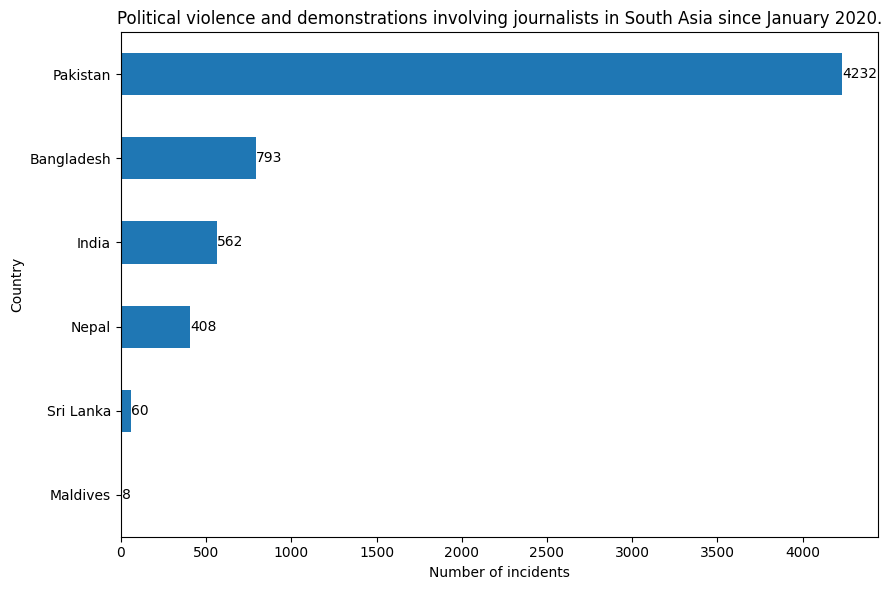

In [15]:
# Creating the bar chart for the political violence and demonstrations involving journalists and media workers in South Asia.

import matplotlib.pyplot as plt

country_counts = after20.groupby('country')\
    .size()\
    .sort_values()\
    .reset_index(name='count')
ax = country_counts.plot(
    kind='barh',
    x='country',
    y='count',
    figsize=(9, 6),
    legend=False
)


for i, count in enumerate(country_counts['count']):
    ax.text(count + 0.5, i, str(count), va='center')

    
plt.title('Political violence and demonstrations involving journalists in South Asia since January 2020.')
plt.xlabel('Number of incidents')
plt.ylabel('Country')

plt.tight_layout()
plt.savefig('bar_chart_journalist_incidents.png', dpi=300)
plt.show()


In [ ]:

#Counting fatalities by country

after20.groupby('country')['fatalities'].sum().sort_values(ascending=False).reset_index(name='fatalities')


In [ ]:
print(f"Total fatalities in South Asia: {after20['fatalities'].sum()}")

# In the past five years, 247 people have died in political violence and demonstrations involving journalists and media workers across four South Asian countries.

In [ ]:
# Comparing the total political violence and demonstrations vs fatalities

fatality_rate = (after20.groupby('country')['fatalities'].sum()/after20.groupby('country').size()).round(3).sort_values(ascending=False)

print(fatality_rate)



# Bangladesh has the highest rate of fatalities in political violence and demonstrations involving journalists and media workers among South Asian countries. An analysis of data from the Armed Conflict Location & Event Data (ACLED) project shows that, on average, one person died in every five reported incidents in Bangladesh over the last five years. Of the six South Asian countries that recorded such demonstrations (excluding Bhutan and Afghanistan), the Maldives and Sri Lanka reported no fatalities. Pakistan saw the highest number of demonstrations but maintained the lowest fatality rate among countries with reported deaths, just nine fatalities per thousand incidents.

In [ ]:


# Getting Counts and Fatalities

counts = after20.groupby('country').size()
fatalities = after20.groupby('country')['fatalities'].sum()
fatality_rate = (fatalities / counts).round(3)

# Combine into one aligned DataFrame
plot_df = pd.DataFrame({
    'incident_count': counts,
    'fatality_rate': fatality_rate
}).reset_index() 

plt.figure(figsize=(10,6))
plt.scatter(plot_df['incident_count'], plot_df['fatality_rate'])


for i, row in plot_df.iterrows():
    x = row['incident_count']
    y = row['fatality_rate']
    country = row['country']
    
    if country == 'Maldives':
        plt.text(x, y + 0.006, country, fontsize=9, ha='center') 
    elif country == 'Sri Lanka':
        plt.text(x + 30, y, country, fontsize=9, ha='left')      
    else:
        offset = 0.005 if y > 0 else 0.001
        plt.text(x, y + offset, country, fontsize=9, ha='center')

plt.xlabel('Number of Incidents')
plt.ylabel('Fatalities per Incident')
plt.title('Fatality Rate vs Number of Political Violence Incidents by Country')
plt.grid(True, linestyle='--', alpha=0.5)
plt.tight_layout()
plt.savefig('scatter_fatality_rate_vs_incidents.png', dpi=300)
plt.show()


In [ ]:

# Counting fatalities by event type for the four countries with recorded fatalities.

# Major event type resulting in fatalities in Bangladesh

after20[after20['country'] == 'Bangladesh']\
    .groupby('event_type')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

In [ ]:
# Major event type resulting in fatalities in India

after20[after20['country'] == 'India']\
    .groupby('event_type')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

In [ ]:
# Major event type resulting in fatalities in Nepal

after20[after20['country'] == 'Nepal']\
    .groupby('event_type')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

In [ ]:
# Major event type resulting in fatalities in Pakistan

after20[after20['country'] == 'Pakistan']\
    .groupby('event_type')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

# The data shows that most fatalities resulting from political violence and demonstrations involving journalists and media workers are attributed to riots. According to ACLED, riots are violent events involving three or more individuals who engage in destructive acts such as physical attacks, rock throwing, or property damage. 

### Fatalities from 'Violence against civilians' are also notable. ACLED defines this as violence by armed groups against unarmed non-combatants. Among countries with reported deaths, only Bangladesh, India, and Pakistan recorded fatalities under this category. Let's examine which actors were involved in each.

In [ ]:
#Bangladesh

after20[(after20['country'] =='Bangladesh') & (after20['event_type'] =='Violence against civilians')]\
    .groupby('inter1')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

In [ ]:
#India

after20[(after20['country'] =='India') & (after20['event_type'] =='Violence against civilians')]\
    .groupby('inter1')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

In [ ]:
#Pakistan

after20[(after20['country'] =='Pakistan') & (after20['event_type'] =='Violence against civilians')]\
    .groupby('inter1')['fatalities']\
    .sum()\
    .sort_values(ascending=False)\
    .reset_index(name='fatalities')

# Only Bangladesh, India, and Pakistan recorded fatalities under the 'Violence against civilians' category. Data shows that political militias are responsible for nearly 90% of these across the three countries.

In [ ]:
# Code preparation for Datawrapper 

# Create incidents data
incidents_data = after20.groupby(['country', 'latitude', 'longitude']).size().reset_index(name='value')
incidents_data['type'] = 'incidents'

# Create fatalities data (only locations with deaths)
fatalities_data = after20.groupby(['country', 'latitude', 'longitude'])['fatalities'].sum().reset_index(name='value')
fatalities_data = fatalities_data[fatalities_data['value'] > 0]
fatalities_data['type'] = 'fatalities'

# Combine both datasets
combined_map = pd.concat([incidents_data, fatalities_data], ignore_index=True)
combined_map.to_csv('combined_map.csv', index=False)

print(f"Combined map: {len(combined_map)} total points")
print(f"- Incidents: {len(incidents_data)} locations")
print(f"- Fatalities: {len(fatalities_data)} locations")
